Text(0.5, 1.0, 'Original Image')

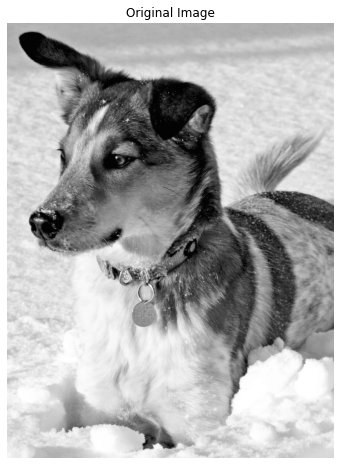

In [3]:
from matplotlib.image import imread
import matplotlib.pyplot as plt
import numpy as np
import os
plt.rcParams['figure.figsize'] = [16, 8]


A = imread(os.path.join('DATA','dog.jpg'))
X = np.mean(A,-1); # Convert RGB to grayscale

plt.figure()
plt.imshow(X,cmap='gray')
plt.axis('off')
plt.title('Original Image')

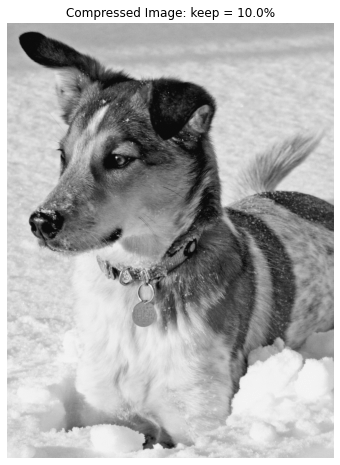

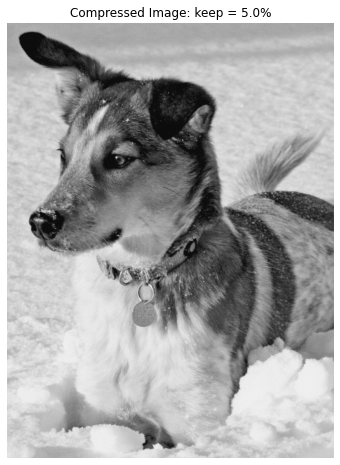

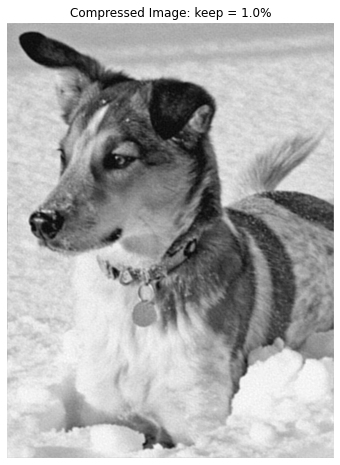

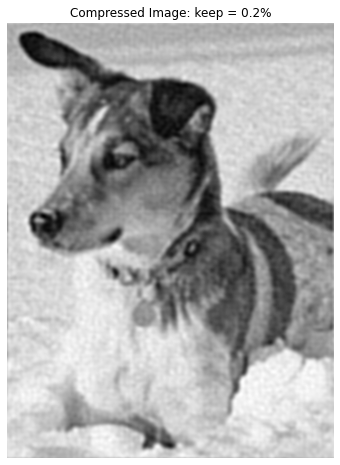

In [4]:
Xt=np.fft.fft2(X)
Xtsort=np.sort(np.abs(Xt.reshape(-1)))

for keep in (0.1, 0.05, 0.01, 0.002):
    thresh=Xtsort[int(np.floor((1-keep)*len(Xtsort)))]
    ind=np.abs(Xt)>thresh
    Atlow=Xt*ind
    Alow=np.fft.ifft2(Atlow).real
    plt.figure()
    plt.imshow(Alow,cmap='gray')
    plt.axis('off')
    plt.title('Compressed Image: keep = ' + str(keep*100)+'%')

Text(0.5, 1.0, 'Error')

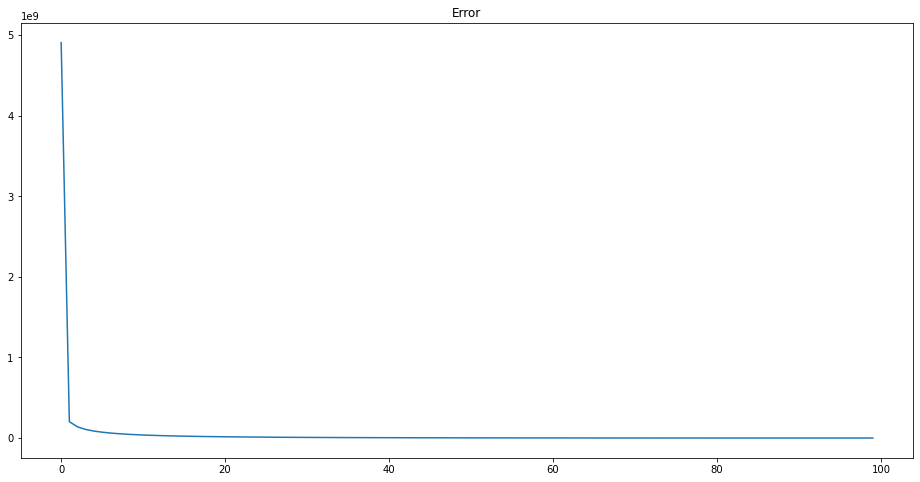

In [16]:
u=np.linspace(0.00001,0.9999,100)
err=np.zeros_like(u)
count=0;
for i in u:
    thresh=Xtsort[int(np.floor((1-i)*len(Xtsort)))]
    ind=np.abs(Xt)>thresh
    Atlow=Xt*ind
    Alow=np.fft.ifft2(Atlow).real
    err[count]=np.square(np.linalg.norm(X-Alow))
    count+=1
    
plt.figure()
plt.plot(err)
plt.title('Error')